# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

In [1]:
from pylab import *
from numpy import *
from scipy import *

%matplotlib inline

(array([19], dtype=int64),)
19 cykli w czasie trwania pomiaru
Okres: 133.78947368421052 miesięcy
Okres: 11.149122807017543 lat


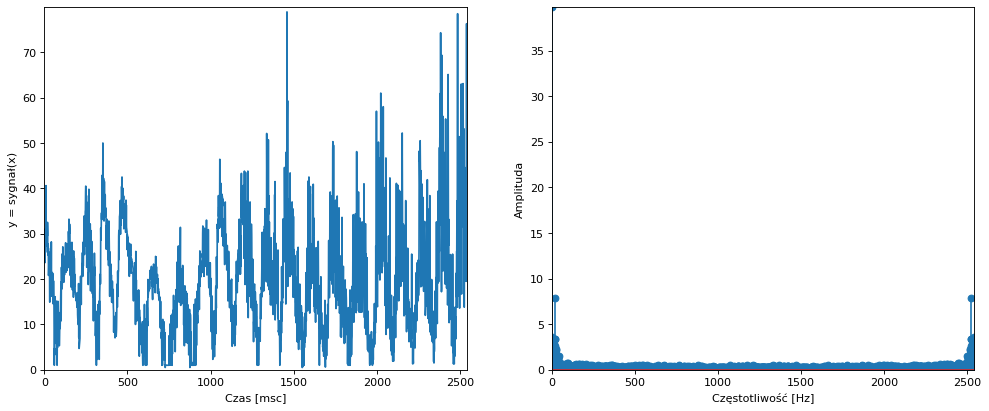

In [91]:
array = np.genfromtxt('spots.txt')
n = len(array)
t = np.arange(0,n)

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, array, '-')
ax.set_xlabel("Czas [msc]")
ax.set_ylabel("y = sygnał(x)")
ax.set_xlim(0, n)
ax.set_ylim(0, 1 + max(array))

signal1 = np.fft.fft(array)
signal1 = abs(signal1)/(0.5*n)

ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
freqs = [i for i in range(n)]
stem(freqs, signal1, '-*');
#max(signal1[1:])
ax.set_xlim(0, n)
ax.set_ylim(0, 0.01 + max(signal1))

x = max(signal1[1:])
ind = np.where(signal1 == x)
print(ind)
T = n/19 # 19 - Częstotliwość
print("19 cykli w czasie trwania pomiaru" )
print("Okres: " + str(T) + " miesięcy")
print("Okres: " + str(T/12) + " lat")

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

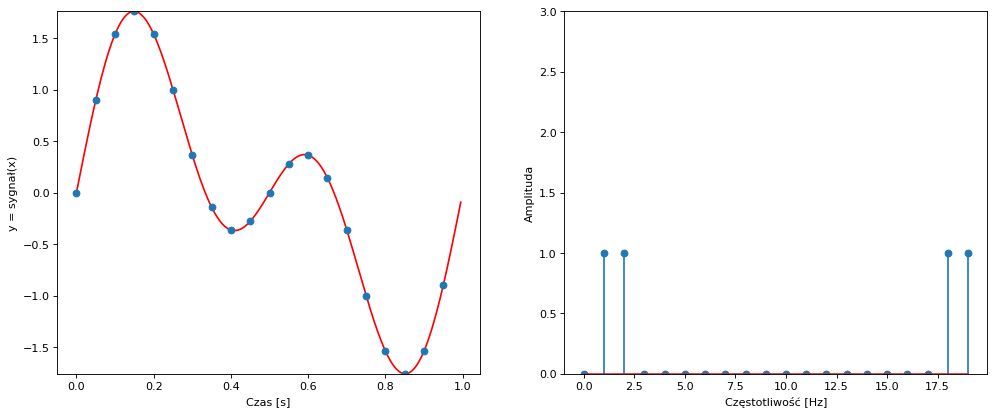

In [3]:
A = 1
LP = 1
w = 20
f = 1.0
T = 1.0/f
TW = 1.0/w 
t = np.arange(0, LP*T, TW)
n = len(t)
FUNC = lambda t : np.sin(2*pi*t) + np.sin(4*pi*t)
signal = FUNC(t)                 
    
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
    
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
    
ax.set_xlabel("Czas [s]")
ax.set_ylabel("y = sygnał(x)")
ax.plot(t, signal, 'o')
    
signal1 = fft.fft(signal) 
signal1 = abs(signal1)/(0.5*n)

freqs = [w/n*i for i in range(n)]

ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
    
show()

C:\Users\weron\Miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


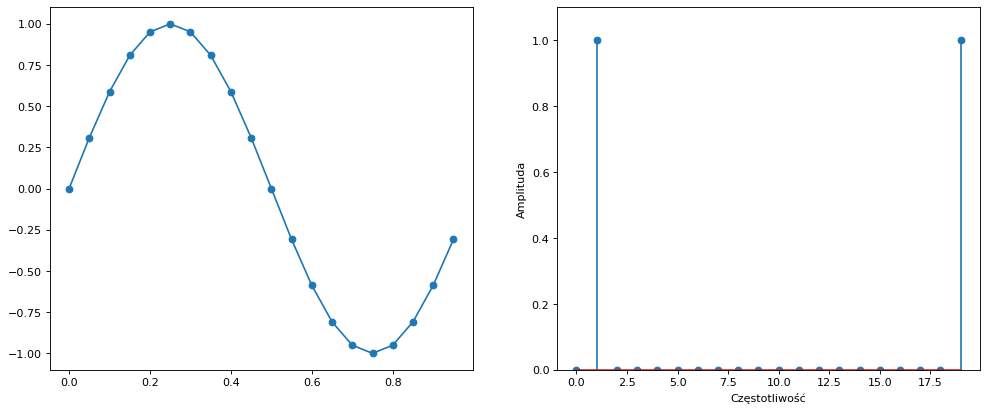

In [5]:
signal1 = fft.fft(signal)
signal1[2] = 0+0j
signal1[-2] = 0+0j

base_signal = fft.ifft(signal1)

t = np.arange(0, LP*T, TW)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, base_signal, 'o-')

signal1 = abs(signal1)/(0.5*len(signal1))

ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_ylim([0.0,1.1*ymax])
ax.set_xlabel("Częstotliwość")
ax.set_ylabel("Amplituda")
freqs = [i * w / n for i in range(n)]
stem(freqs, signal1, '-*');

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

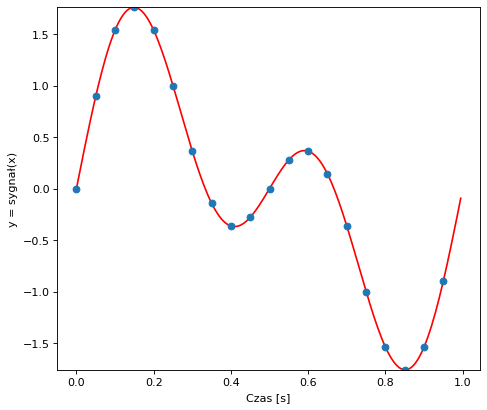

In [23]:
A = 1
LP = 1
w = 20
f = 1.0
T = 1.0/f
TW = 1.0/w 
t = np.arange(0, LP*T, TW)
n = len(t)
FUNC = lambda t : np.sin(2*pi*t) + np.sin(4*pi*t)
signal = FUNC(t)                 
    
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
    
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
    
ax.set_xlabel("Czas [s]")
ax.set_ylabel("y = sygnał(x)")
ax.plot(t, signal, 'o')

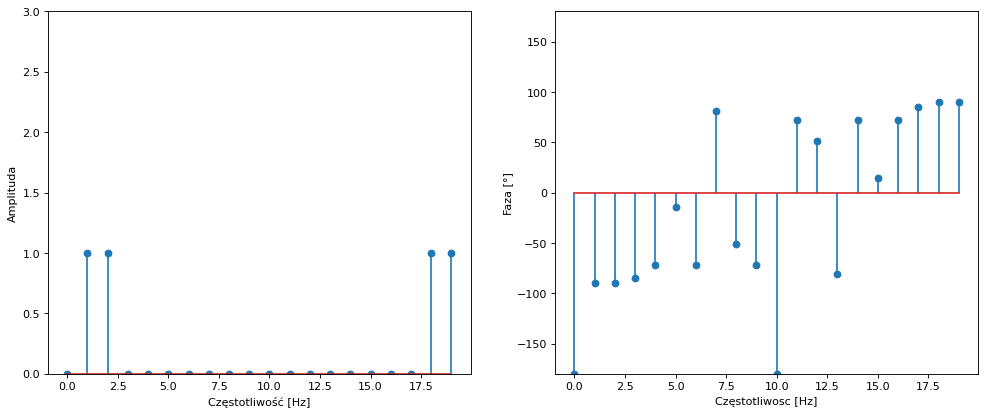

In [24]:
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)

signal1 = fft.fft(signal) 
signal1_freq = abs(signal1)/(0.5*n)

freqs = [w/n*i for i in range(n)]

ymax = max(signal1_freq)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1_freq, '-*')
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
    

ax = fig.add_subplot(122)
signal1_phas = np.angle(signal1, deg=True)
ax.set_ylim([-180.0,180])
ax.set_xlabel("Częstotliwosc [Hz]")
ax.set_ylabel("Faza [°]")
stem(freqs, signal1_phas, '-*')
    
show()

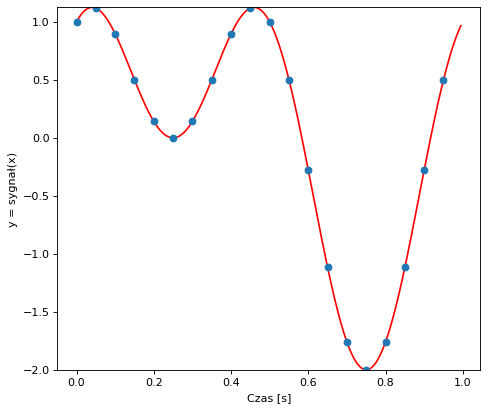

In [25]:
A = 1
LP = 1
w = 20
f = 1.0
T = 1.0/f
TW = 1.0/w 
t = np.arange(0, LP*T, TW)
n = len(t)
FUNC = lambda t : np.sin(2*pi*t) + np.cos(4*pi*t)
signal = FUNC(t)  

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
    
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
    
ax.set_xlabel("Czas [s]")
ax.set_ylabel("y = sygnał(x)")
ax.plot(t, signal, 'o')

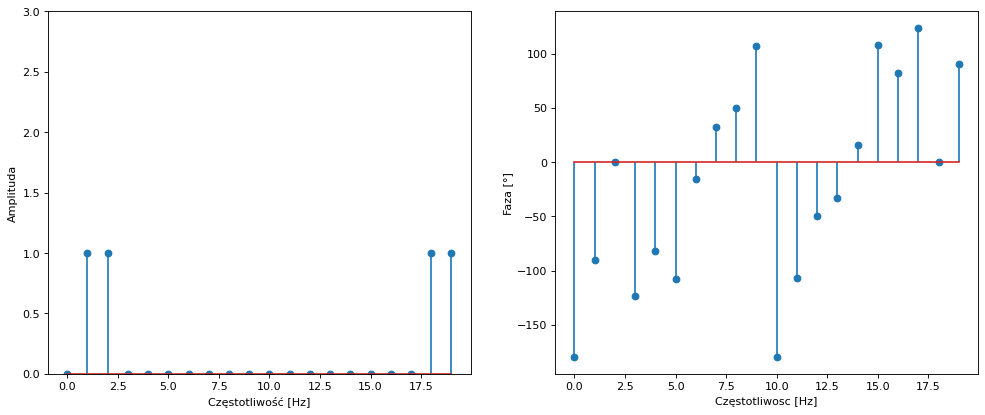

In [26]:
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)

signal1 = fft.fft(signal)
signal1_freq = abs(signal1)/(0.5*n)

freqs = [w/n*i for i in range(n)]
ymax = max(signal1_freq)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1_freq, '-*')
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
    

ax = fig.add_subplot(122)
signal1_phas = np.angle(signal1, deg=True)
ymax = max(signal1_phas)
ax.set_xlabel("Częstotliwosc [Hz]")
ax.set_ylabel("Faza [°]")
stem(freqs, signal1_phas, '-*')
    
show()

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


146 [Hz]
226 [Hz]
238 [Hz]
251 [Hz]


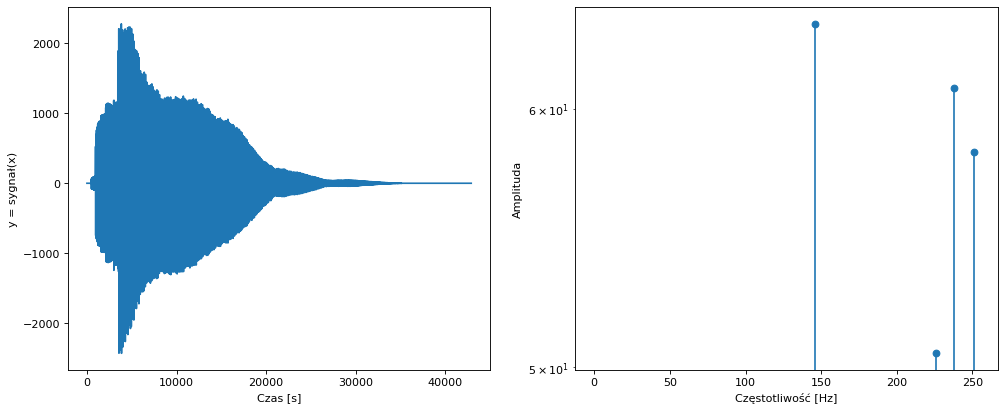

In [42]:
import scipy.io.wavfile
w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]   #Tylko pierwszy kanał

n = len(signal)
t = np.arange(0,n)

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, '-')
ax.set_xlabel("Czas [s]")
ax.set_ylabel("y = sygnał(x)")

#--- Wykonujemy FFT
signal1 = scipy.fft.fft(signal)
signal1 = abs(array)
signal1 = signal1[::10]
signal1 = [signal if signal >= 0.7*max(signal1) else 0 for signal in signal1]
i = 0
for signal in signal1:
    if signal > 0:
        print(str(i) + " [Hz]")
    i += 1

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
ax.set_yscale('log')
freqs = [i for i in range(len(signal1))]
stem(freqs, signal1, '-*');